Ultralytics YOLOv8.0.34  Python-3.9.16 torch-1.13.1+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 C:\Users\bertw\Documents\Projects\volleybill\ml\data\raw\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 90.2ms
Speed: 0.0ms pre-process, 90.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


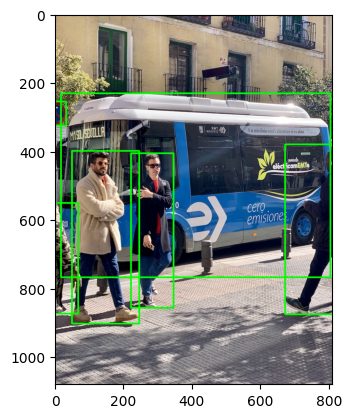

In [14]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("../models/yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
#model.train(data="coco128.yaml", epochs=3)  # train the model
#metrics = model.val()  # evaluate model performance on the validation set
results = model("../data/processed/vball_frame.png")  # predict on an image

for r in results: 
    boxes = r.boxes  # Boxes object for bbox outputs
    masks = r.masks  # Masks object for segmenation masks outputs
    probs = r.probs  # Class probabilities for classification outputs

import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../data/processed/vball_frame.png', 1) #1 reads in color
#RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for box in results[0].boxes: 

    xB = int(box.xyxy[0][0])
    xA = int(box.xyxy[0][2])
    yB = int(box.xyxy[0][3])
    yA = int(box.xyxy[0][1])
    cv2.rectangle(img, (xA, yA), (xB, yB), (0, 255, 0), 4)

RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()